# <div align="center">Lab 4 - Linear Regression </div>
## <div align="center"> Elder de Sousa Whalen </div>
## <div align="right"> 10.03.2020 </div>

### Overview
[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is an approach to model the relationship between a dependent variable (output variable) and one independent variable (input variable) for simple linear regression, or multiple independent variables for a multiple linear regression.

For this assignment, a simple linear regression model and [multiple linear regression model(s)](https://en.wikipedia.org/wiki/Linear_regression) will be created using the [diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) data set that can be imported from the skealearn.datasets package. For the simple linear regression the input variable BMI was chosen with the objective of explaining the variation in the output variable attributed to the variation in the BMI variable. 

For the multiple linear regression, initially all the independent variables will be used to build a model. The R-squared and [RMSE (root-mean-square error)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) statistics will be calculated and compared to the simple linear regression model. A higher R-squared and lower RMSE values means that the model was improved and is more accurate.

If any of the independent variables from the multiple linear regression model are correlated with each other, it will be removed from the model and then the R-squared and RMSE will be recalculated to check if there is any improvement in the model, performing a [stepwise regression](https://en.wikipedia.org/wiki/Stepwise_regression) using the backwards elimination method.

In the case of presence of correlated independent variables [multicolinearity](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/) can occur. Two main problems are caused if the multicolinearity is observed: the coefficients estimates can vary greatly depending on which other input variables are used in the model; reduced precision in the estimated coefficients which leads to a weaker model.

For both models, the dataset will be split between train and test datasets. With the train dataset containing about 90% of the data.

### Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
# Load the diabetes dataset that is already scaled and display the independent variables
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(df.shape)
df.head()

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
# Convert the target variable to a data frame. Used later to check for missing values.
df_y = pd.DataFrame(diabetes.target)
df_y.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


### Exploratory Data Analysis

In [ ]:
# Check missing values on the independent variables
print(np.isnan(df.values).any())

False


In [ ]:
# Check missing values on the dependent variable
print(np.isnan(df_y.values).any())

False


In [ ]:
# Summary of the 10 independent variables
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


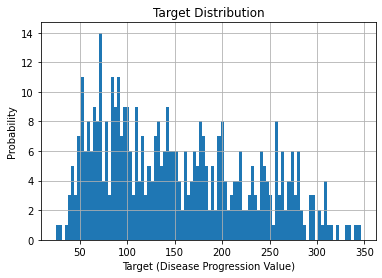

In [ ]:
# Histogram of the target variable
df_y.hist(bins=100)

# Set the title and labels
plt.xlabel('Target (Disease Progression Value)')
plt.ylabel('Probability')
plt.title('Target Distribution')

# show the plot
plt.show()

The histogram above shows that the target variable has a distribution skewed to the right.

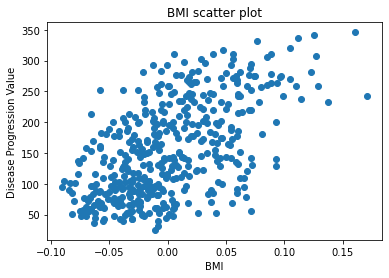

In [ ]:
plt.scatter(df.bmi, diabetes.target)

plt.xlabel('BMI')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()

The scatter plot above shows positive relationship, meaning when the BMI values increase, the Disease Progression Value tend to increase too.

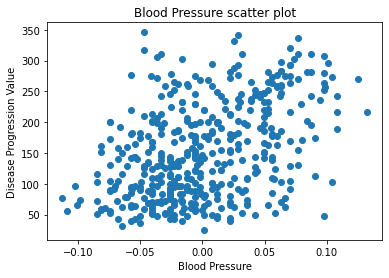

In [ ]:
plt.scatter(df.bp, diabetes.target)

plt.xlabel('Blood Pressure')
plt.ylabel('Disease Progression Value')
plt.title('Blood Pressure scatter plot')
plt.show()

The scatter plot above shows a very weak positive relationship, a low positive value of correlation. There are more cases of higher Disease Progression Values when the Blood Pressure is high.

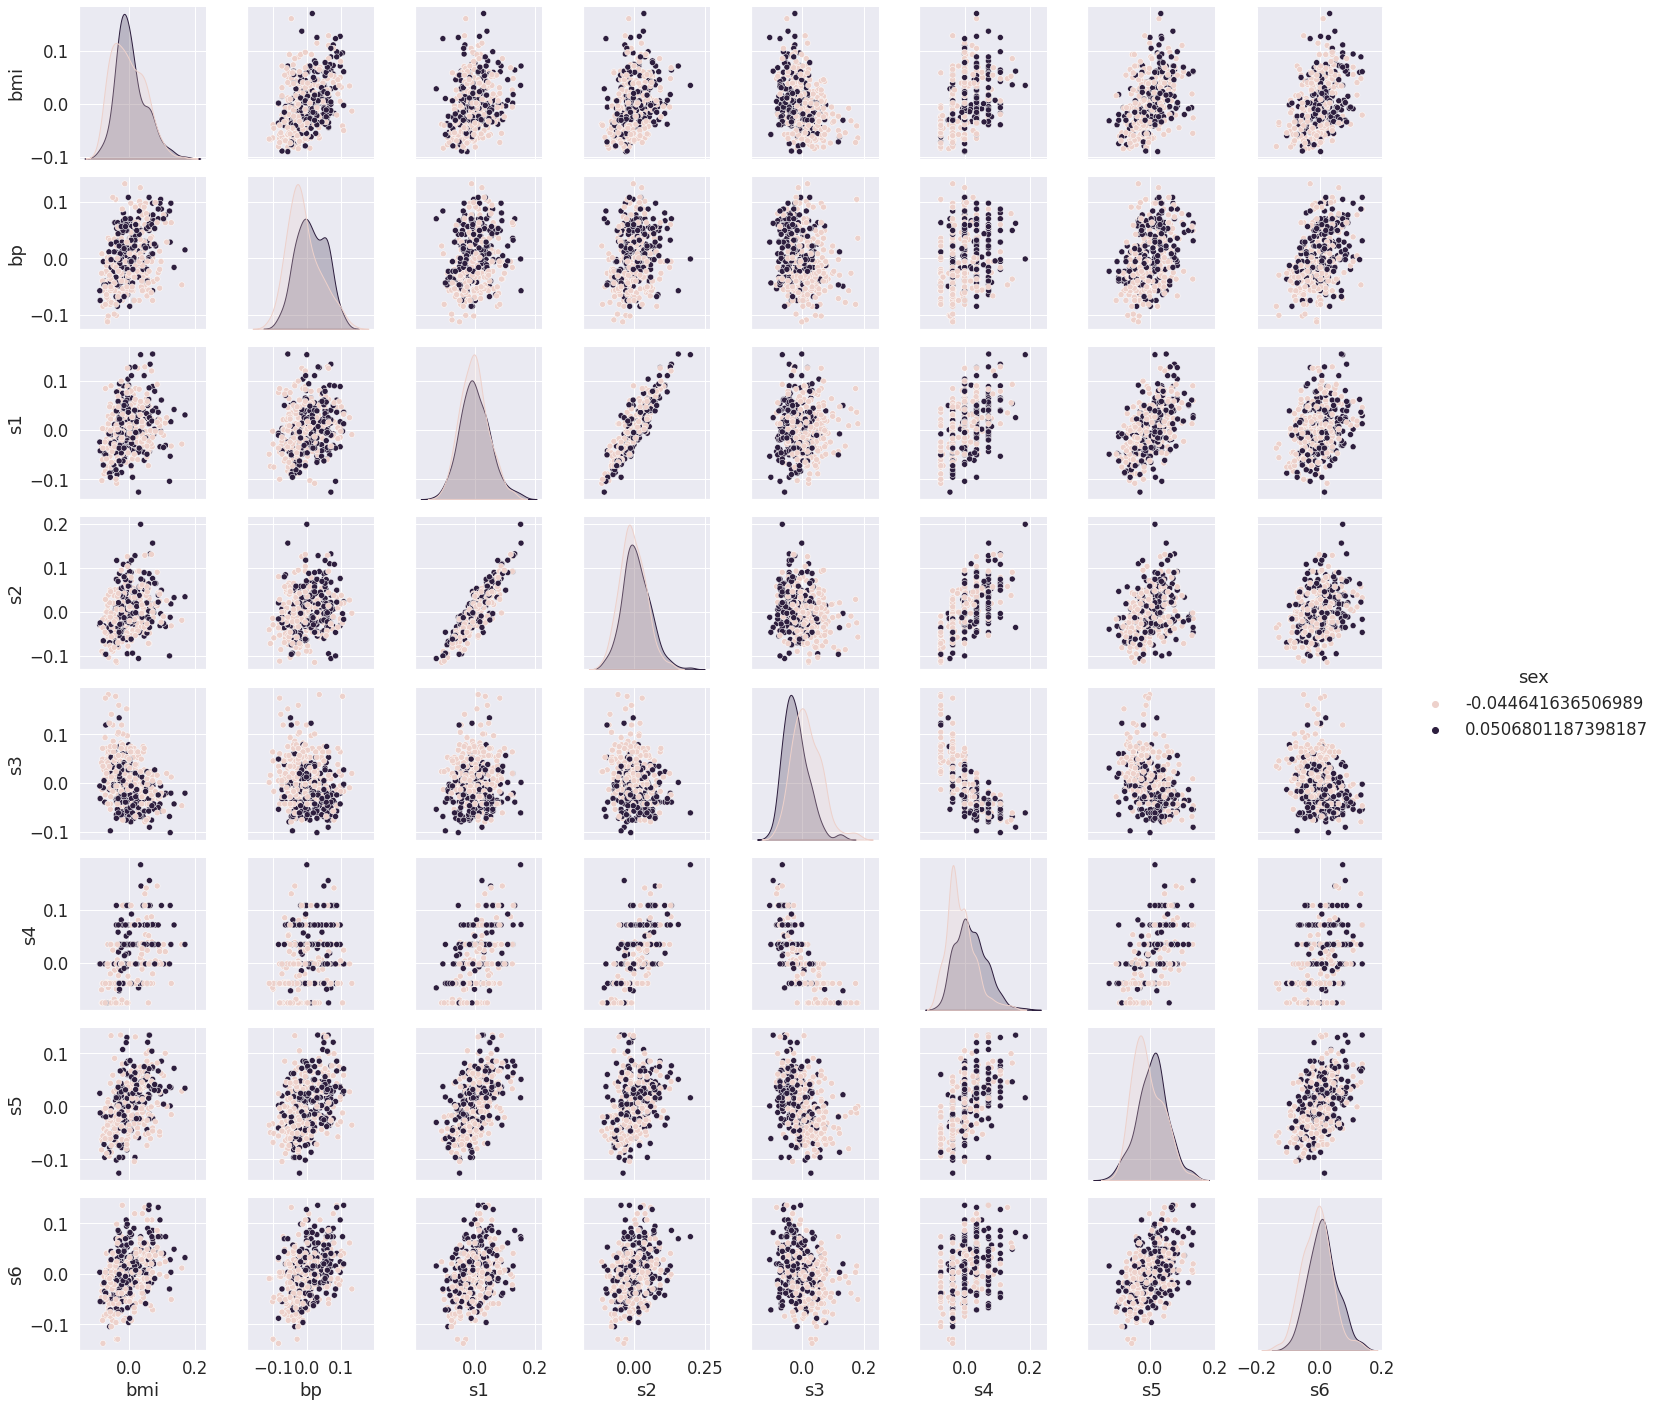

In [ ]:
# Attempt to observer the relationship between the independent variables separated by sex.
import seaborn as sns

sns.set(font_scale=1.5)
sns.pairplot(
    df,
    vars=["bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"],
    hue = "sex"
)

It's clear from the picture above that there is a very strong positive linear relationship between the variables s1 and s2. The figure below shows the value of the correlation between all independent variables. As expected, the value of the correlation between s1 and s2 is very hight (0.9) which causes multicolinearity. Other variables also show a strong correlation value, like the variables s3 and s4 (-0.74).

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: vmin, vmax. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


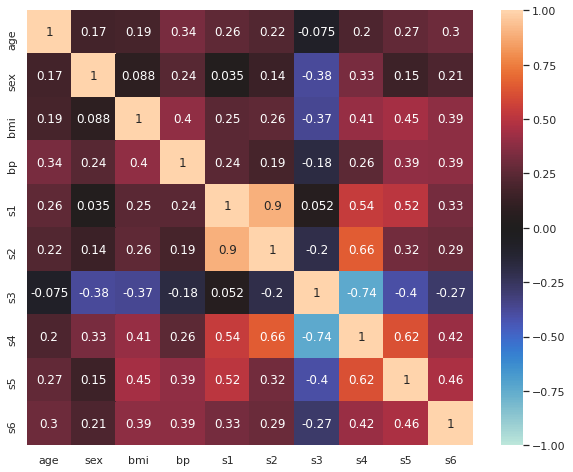

In [ ]:
sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(10,8))
corrmat = df.corr() 
sns.heatmap(corrmat,-1,1,ax=ax,center=0,annot=True);

### Models

#### Single linear regression model using BMI variable<br>
The following code creates a simple linear regression model using only BMI as the input variable.

diabetes_X shape: (442, 1)
diabetes_X_train shape: (402, 1)
diabetes_X_test shape: (40, 1)
Intercept: 
 152.9043003554328
Coefficients: 
 [955.44001079]
Mean squared error: 3309.16
Coefficient of determination: 0.42


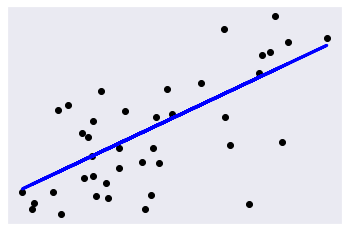

In [ ]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# Load the diabetes dataset 
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

print('diabetes_X shape: (%d, %d)' % diabetes_X.shape)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-40]
diabetes_X_test = diabetes_X[-40:]

print('diabetes_X_train shape: (%d, %d)' % diabetes_X_train.shape)
print('diabetes_X_test shape: (%d, %d)' % diabetes_X_test.shape)

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-40]
diabetes_y_test = diabetes_y[-40:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))


# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Equation of the model<br>
$\hat{y} = 152.9 + 955.44X$, where $X$ represents the BMI variable

In [ ]:
# The mean squared error
print('\nVariance score (R squared): %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


Variance score (R squared): 0.42


From the value of the R-squared above we can say that 42% of the variance in the output variable is explained by BMI.

In [ ]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
 
print("Root mean squared error: %.2f"
      % np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred)) )
 
print("\nMean of diabetes target variable = ",diabetes_y_test.mean())
 
print("RMSE percentage of diabetes mean = ", \
      100 * np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred))/diabetes_y_test.mean())

Mean squared error: 3309.16
Root mean squared error: 57.53

Mean of diabetes target variable =  148.575
RMSE percentage of diabetes mean =  38.71803292817201


The Mean squared error, or its root (RMSE) would be better used if compared to the same values from a different model. This way we could select the model with the smaller MSE. But given the value of the RMSE percentage of about 38.7%, we could say that the model is not very accurate as there is a high variance in the error.

In [ ]:
#  scipy.stats OLS linear regression model
import statsmodels.api as sm

X_train1 = sm.add_constant(diabetes_X_train)
lm1 = sm.OLS(diabetes_y_train, X_train1).fit()
lm1.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           1.73e-37
Time:                        19:52:47   Log-Likelihood:                -2234.9
No. Observations:                 402   AIC:                             4474.
Df Residuals:                     400   BIC:                             4482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.9043      3.142     48.661      0.000     146.727     159.082
x1           955.4400     67.120     14.235      0.000     823.487    1087.393
==============================================================================
Omnibus:                       14.448   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.445
Skew:                           0.184   Prob(JB):                       0.0147
Kurtosis:                       2.393   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for the F-test was statistically significant, so the model is accepted.

#### Multiple linear regression model with all input variables <br>
The following code creates a multiple linear regression model using all the independent variables from the diabetes dataset.

In [ ]:
diabetes_X = diabetes.data
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-40]
diabetes_X_test = diabetes_X[-40:]
 
# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)


# The intercept
print('Intercept: \n', regr.intercept_) 
# The coefficients
print('Coefficients: \n', fit.coef_)
print ( type(fit.coef_))

Intercept: 
 152.9043003554328
Coefficients: 
 [   5.62794633 -238.02205888  520.73932874  298.14147012 -749.36588519
  444.3914458    80.26193399  182.6639517   706.68234953   89.24217193]
<class 'numpy.ndarray'>


#### Equation of the model<br>
$\hat{y} = 152.9 + 5.6X_1 - 238.0X_2 + 520.7X_3 + 298.1X_4 - 749.4X_5 + 444.2X_6 + 80.3X_7
+ 182.7X_8 + 706.7X_9 + 89.2X_{10}$, <br><br>
where $X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_{10}$ represents the age, sex, bmi, bp, s1, s2, s3, s4, s5, s6 variables respectively.

In [ ]:
# https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
# get feature names
colnames = np.asarray(df.columns)

 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = fit.coef_)
df_tbl =  pd.concat ( [df_col, df_coef] , axis = 1 )
df_tbl.columns = ['Columns', 'Coefficients']
df_tbl

,Columns,Coefficients
0,age,5.627946
1,sex,-238.022059
2,bmi,520.739329
3,bp,298.141470
4,s1,-749.365885
5,s2,444.391446
6,s3,80.261934
7,s4,182.663952
8,s5,706.682350
9,s6,89.242172


In [ ]:
#  scipy.stats OLS linear regression model
X_train2 = sm.add_constant(diabetes_X_train)
lm2 = sm.OLS(diabetes_y_train, X_train2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     39.13
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           5.40e-53
Time:                        19:53:11   Log-Likelihood:                -2177.9
No. Observations:                 402   AIC:                             4378.
Df Residuals:                     391   BIC:                             4422.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7104      2.760     55.327      0.000     147.284     158.137
x1             5.6279     63.627      0.088      0.930    -119.465     130.721
x2          -238.0221     65.260     -3.647      0.000    -366.327    -109.717
x3           520.7393     73.133      7.120      0.000     376.956     664.522
x4           298.1415     70.293      4.241      0.000     159.942     436.341
x5          -749.3659    433.995     -1.727      0.085   -1602.622     103.891
x6           444.3914    351.518      1.264      0.207    -246.711    1135.494
x7            80.2619    224.821      0.357      0.721    -361.747     522.271
x8           182.6640    172.095      1.061      0.289    -155.683     521.011
x9           706.6823    180.386      3.918      0.000     352.035    1061.330
x10           89.2422     71.107      1.255      0.210     -50.557     229.041
==============================================================================
Omnibus:                        2.670   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                2.139
Skew:                           0.016   Prob(JB):                        0.343
Kurtosis:                       2.644   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = lm2.params[1:])
df_var = pd.DataFrame( data = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"])
df_p = pd.DataFrame( data = lm2.pvalues[1:])
df_tbl =  pd.concat ( [df_var, df_col, df_coef, df_p] , axis = 1 )
df_tbl.columns = [' Model Variable', 'Variable Name', 'Coefficients', 'P-Value']
df_tbl

,Model Variable,Variable Name,Coefficients,P-Value
0,x1,age,5.627946,9.295621e-01
1,x2,sex,-238.022059,3.009165e-04
2,x3,bmi,520.739329,5.193979e-12
3,x4,bp,298.141470,2.775779e-05
4,x5,s1,-749.365885,8.501717e-02
5,x6,s2,444.391446,2.069094e-01
6,x7,s3,80.261934,7.212814e-01
7,x8,s4,182.663952,2.891571e-01
8,x9,s5,706.682350,1.055386e-04
9,x10,s6,89.242172,2.102116e-01


In [ ]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
 
print("Root mean squared error: %.2f"
      % np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred)) )
 
print("\nMean of diabetes target variable = ",diabetes_y_test.mean())
 
print("RMSE percentage of diabetes mean = ", \
      100 * np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred))/diabetes_y_test.mean())

Mean squared error: 1751.06
Root mean squared error: 41.85

Mean of diabetes target variable =  148.575
RMSE percentage of diabetes mean =  28.164701668468936


The Mean squared error, or its root (RMSE) would be better used if compared to the same values from a different model. This way we could select the model with the smaller MSE. Given the value of the RMSE percentage of about 28%, we can say that this model is better than the model that used only BMI as it showed a smaller value in in the MSE and given that the value of the F-statistic was significant, we should accept the model even in the presence of input variables that were not significant.

#### Stepwise regression: Backwards elimination<br>
For this model, only the variables s1 and s2 will be removed, as they were the ones that showed the highest correlation value.

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
#print(df.head(5))
#print(diabetes_X[0:5,[0,1,2,3,6,7,8,9]]) ### Removing 4th and 5th variables representing s1 and s2
diabetes_X = diabetes_X[:,[0,1,2,3,6,7,8,9]]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-40]
diabetes_X_test = diabetes_X[-40:]

# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)


# The intercept
print('Intercept: \n', regr.intercept_) 
# The coefficients
print('Coefficients: \n', fit.coef_)
print ( type(fit.coef_))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))


Intercept: 
 152.9043003554328
Coefficients: 
 [  -2.67818059 -232.6172165   521.26904644  288.87560025 -346.71816988
  -97.0947215   467.0116166    92.09749764]
<class 'numpy.ndarray'>
Mean squared error: 1814.56
Coefficient of determination: 0.68


In [ ]:
X_train3 = sm.add_constant(diabetes_X_train)
lm3 = sm.OLS(diabetes_y_train, X_train3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.93
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           1.25e-53
Time:                        19:53:28   Log-Likelihood:                -2180.5
No. Observations:                 402   AIC:                             4379.
Df Residuals:                     393   BIC:                             4415.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7479      2.770     55.145      0.000     147.302     158.194
x1            -2.6782     63.508     -0.042      0.966    -127.536     122.180
x2          -232.6172     65.451     -3.554      0.000    -361.295    -103.939
x3           521.2690     72.744      7.166      0.000     378.253     664.285
x4           288.8756     70.433      4.101      0.000     150.402     427.349
x5          -346.7182     92.093     -3.765      0.000    -527.774    -165.662
x6           -97.0947    104.740     -0.927      0.354    -303.015     108.825
x7           467.0116     81.171      5.753      0.000     307.429     626.595
x8            92.0975     71.349      1.291      0.198     -48.177     232.372
==============================================================================
Omnibus:                        3.706   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                2.743
Skew:                           0.031   Prob(JB):                        0.254
Kurtosis:                       2.600   Cond. No.                         47.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
 
print("Root mean squared error: %.2f"
      % np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred)) )
 
print("\nMean of diabetes target variable = ",diabetes_y_test.mean())
 
print("RMSE percentage of diabetes mean = ", \
      100 * np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred))/diabetes_y_test.mean())

Mean squared error: 1814.56
Root mean squared error: 42.60

Mean of diabetes target variable =  148.575
RMSE percentage of diabetes mean =  28.670776325596776


Removing s1 and s2 variables didn't improve the accuracy of the mode when compared to the model that had all variables included. What if only the variables that had a significant p-value were to be included in the model (sex, bmi, bp, s5).

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:,[1,2,3,8]] # Only sex, bmi, bp, s5 variables are in the model

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-40]
diabetes_X_test = diabetes_X[-40:]

# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)


# The intercept
print('Intercept: \n', regr.intercept_) 
# The coefficients
print('Coefficients: \n', fit.coef_)
print ( type(fit.coef_))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))


Intercept: 
 152.9043003554328
Coefficients: 
 [-129.2657498   603.96939031  267.75103504  543.06148483]
<class 'numpy.ndarray'>
Mean squared error: 1857.61
Coefficient of determination: 0.68


No improvemetns in the model.

### Conclusions<br>
For this particular dataset, the model that showed better accuracy was the one that had all the variables included when compared to the model that was created removing first the variables s1 and s2 that had the highest value in correlation between the independent variables and when compared to the model that removed all non-significant variables and only had sex, bmi, bp and s5 independent variables included in the model. Possibly, a better aproach would be to remove a single variable from the mode and check for any improvements in model accuracy, instead of removing multiple variables at once. 

Still, from the results observed in the correlation matrix, multiple variables had some type of relationship with another variable, which makes it difficult for a model to precisily generate coefficients for the included variables, making the model weak.

### References
1. https://en.wikipedia.org/wiki/Linear_regression
2. https://en.wikipedia.org/wiki/Stepwise_regression
3. https://en.wikipedia.org/wiki/Root-mean-square_deviation
4. http://chris35wills.github.io/courses/PythonPackages_matplotlib/matplotlib_multiple_figs/
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
7. https://seaborn.pydata.org/generated/seaborn.pairplot.html
8. https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
9. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
10. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html